#Задача регрессии

Вы будете анализировать один из известных в области анализа данных датасетов, описывающих качество белого и красного вина с помощью их физико-химических свойств. Выберите один из 2 датасетов (репозиторий UCI) https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. Ознакомьтесь с их описанием https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names, осуществите при необходимости перевод на русский язык.


Импорт необходимых модулей

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics


from sklearn.linear_model import LinearRegression as lm

#Разведочный анализ датасета и визуализация данных

Считывание данных в датафрейм, информация о нем и просмотр его верхней части

In [39]:
#  Ваш код здесь
wine = pd.read_csv(
    'winequality-white.csv', delimiter=";")

Вывод описательной статистики по датасету. Какие заключения можно сделать о данных по полученным результатам?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


d:\work\python_projects\jupyter\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


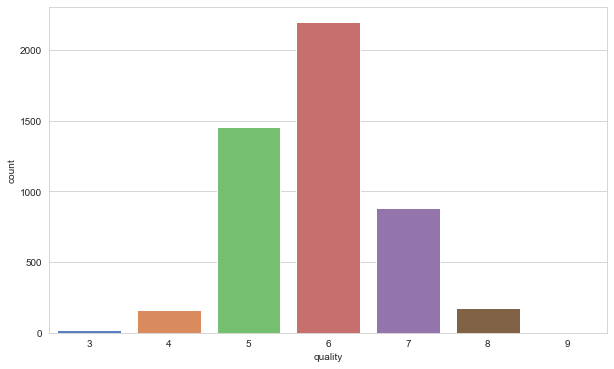

In [71]:
#  Ваш код здесь
wine.info()
plt.figure(figsize=(10, 6))
sns.countplot(wine["quality"], palette="muted")
wine["quality"].value_counts()
wine.describe()

Парные диаграммы. Постройте диаграммы рассеяния. Можно ли заметить какие-то тенденции из анализа парных диаграмм?

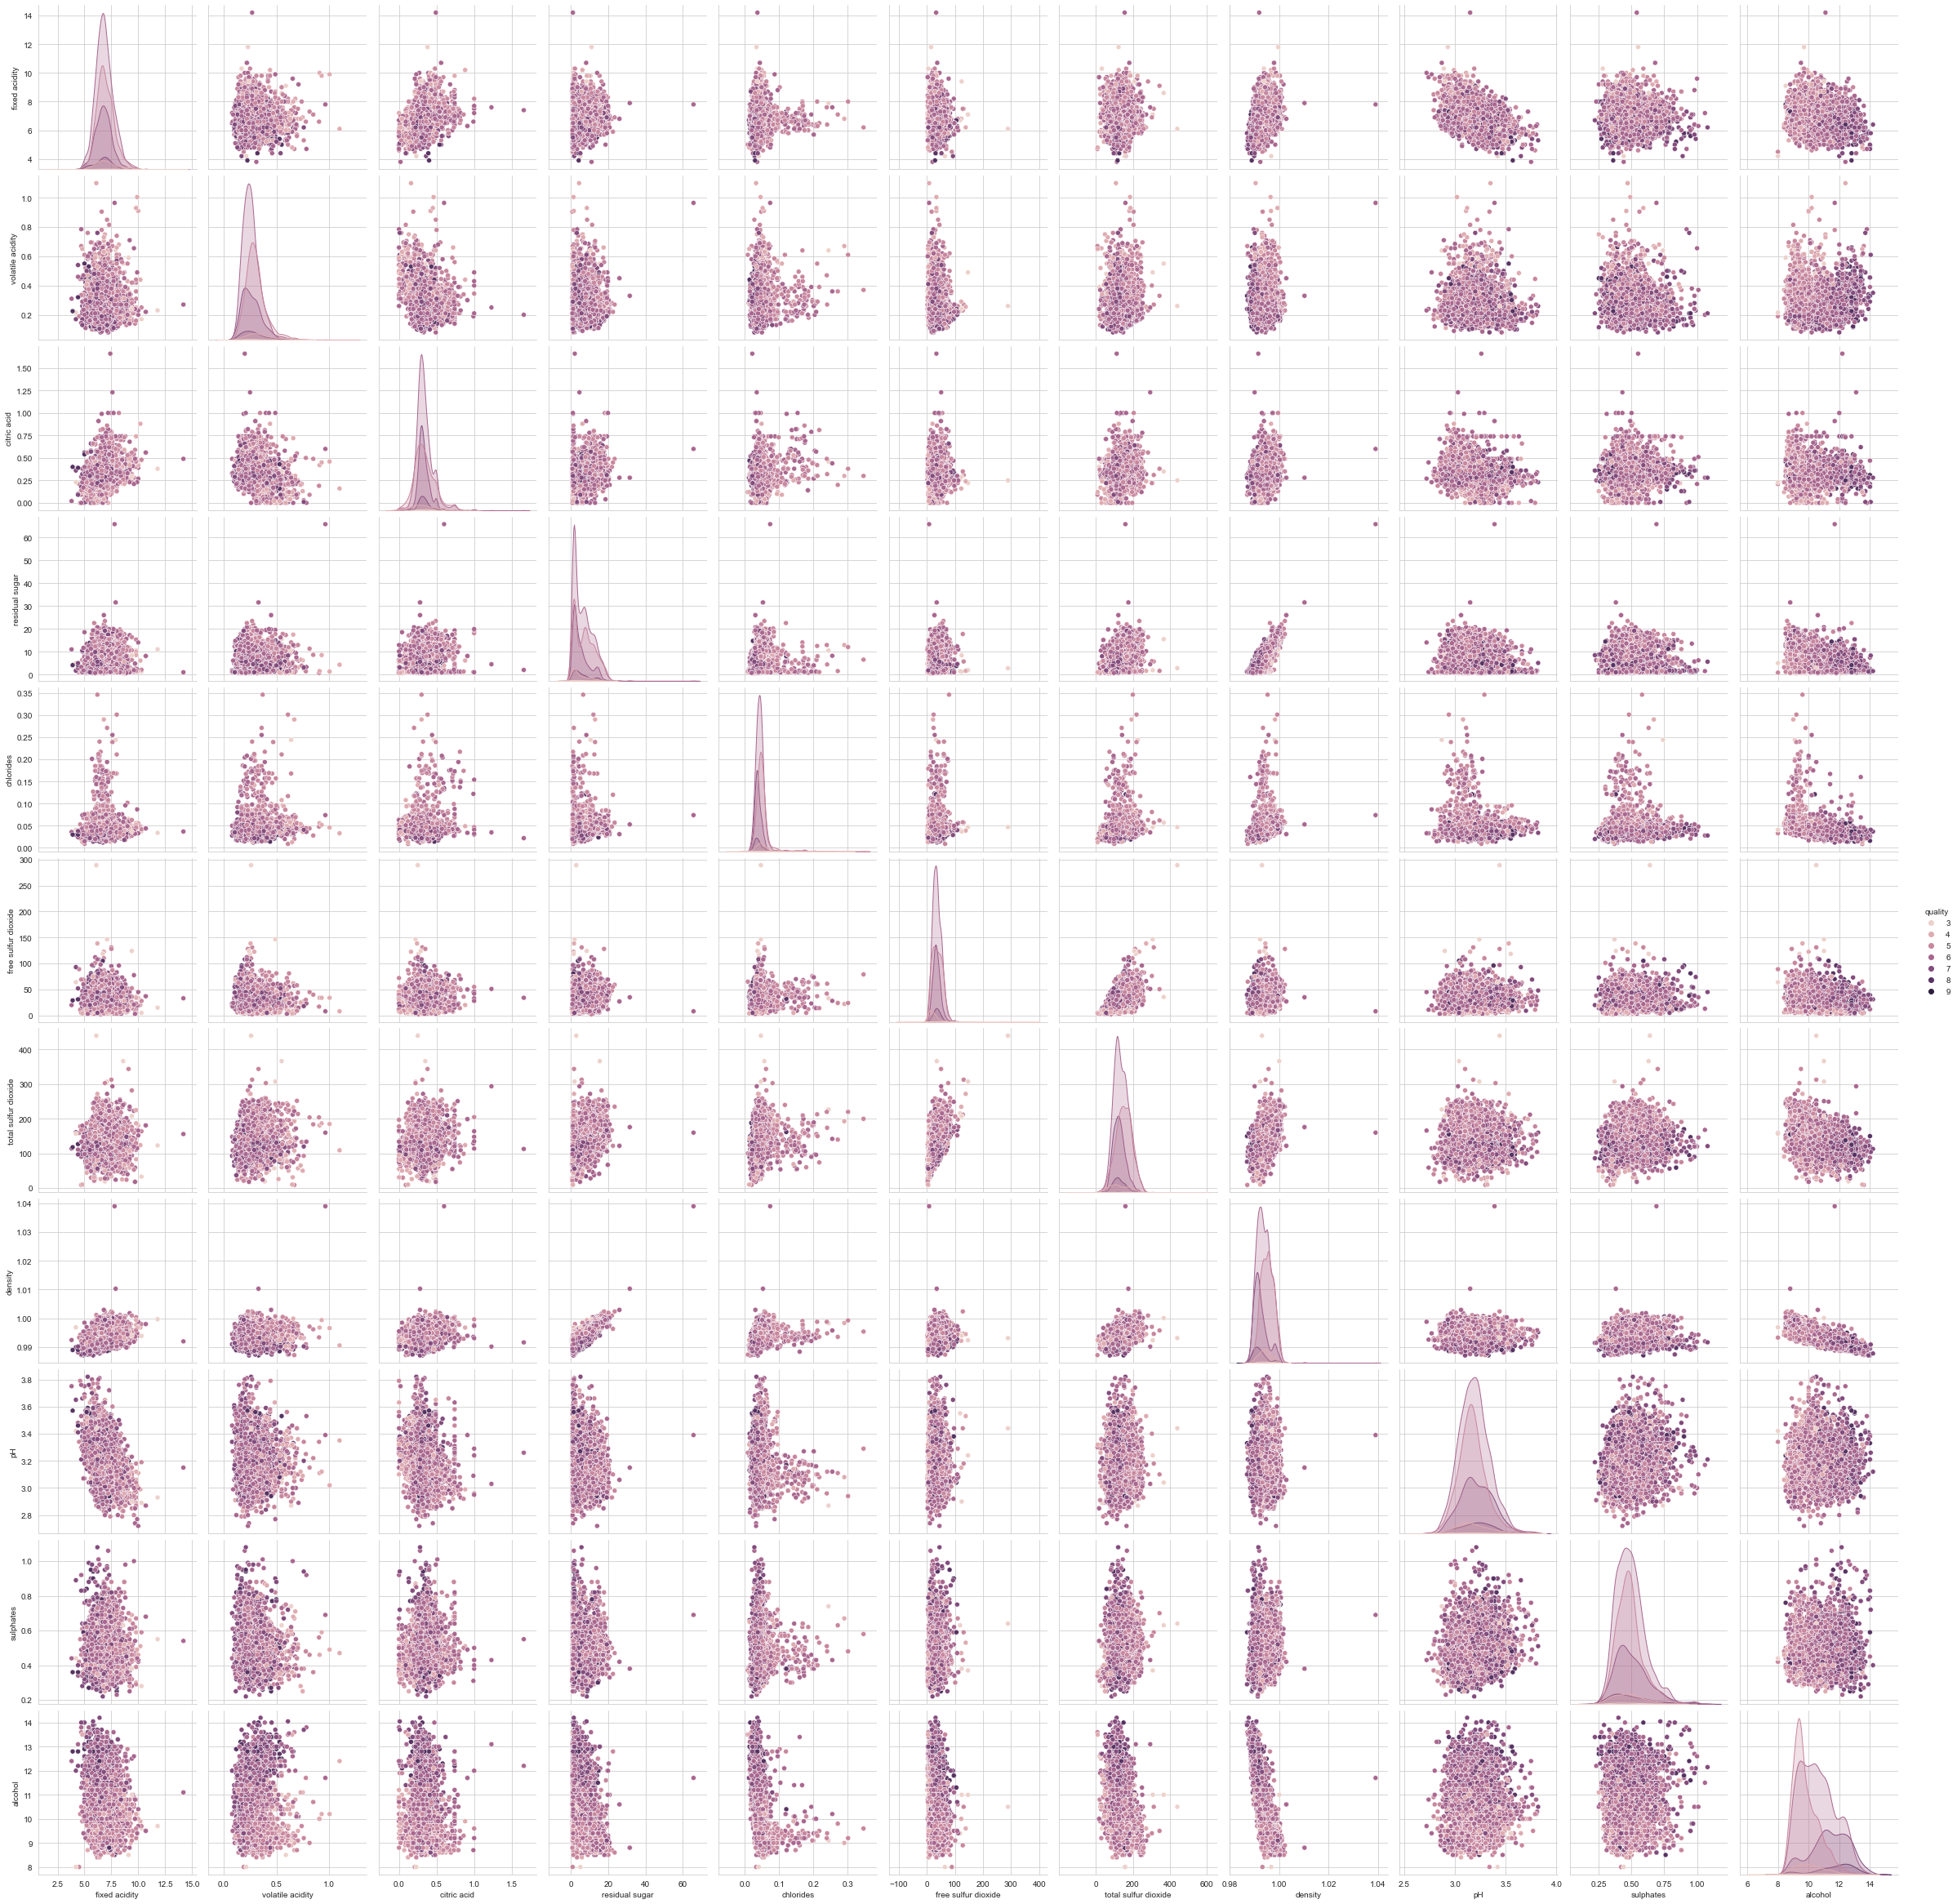

In [70]:
#  Ваш код здесь
sns.set_style("whitegrid");
sns.pairplot(wine, hue="quality", height=3);
plt.show()

Корреляционная матрица. Постройте корреляционную матрицу и диаграмму корреляции. Для каких переменных можно заподозрить существование взаимосвязи?

<AxesSubplot:>

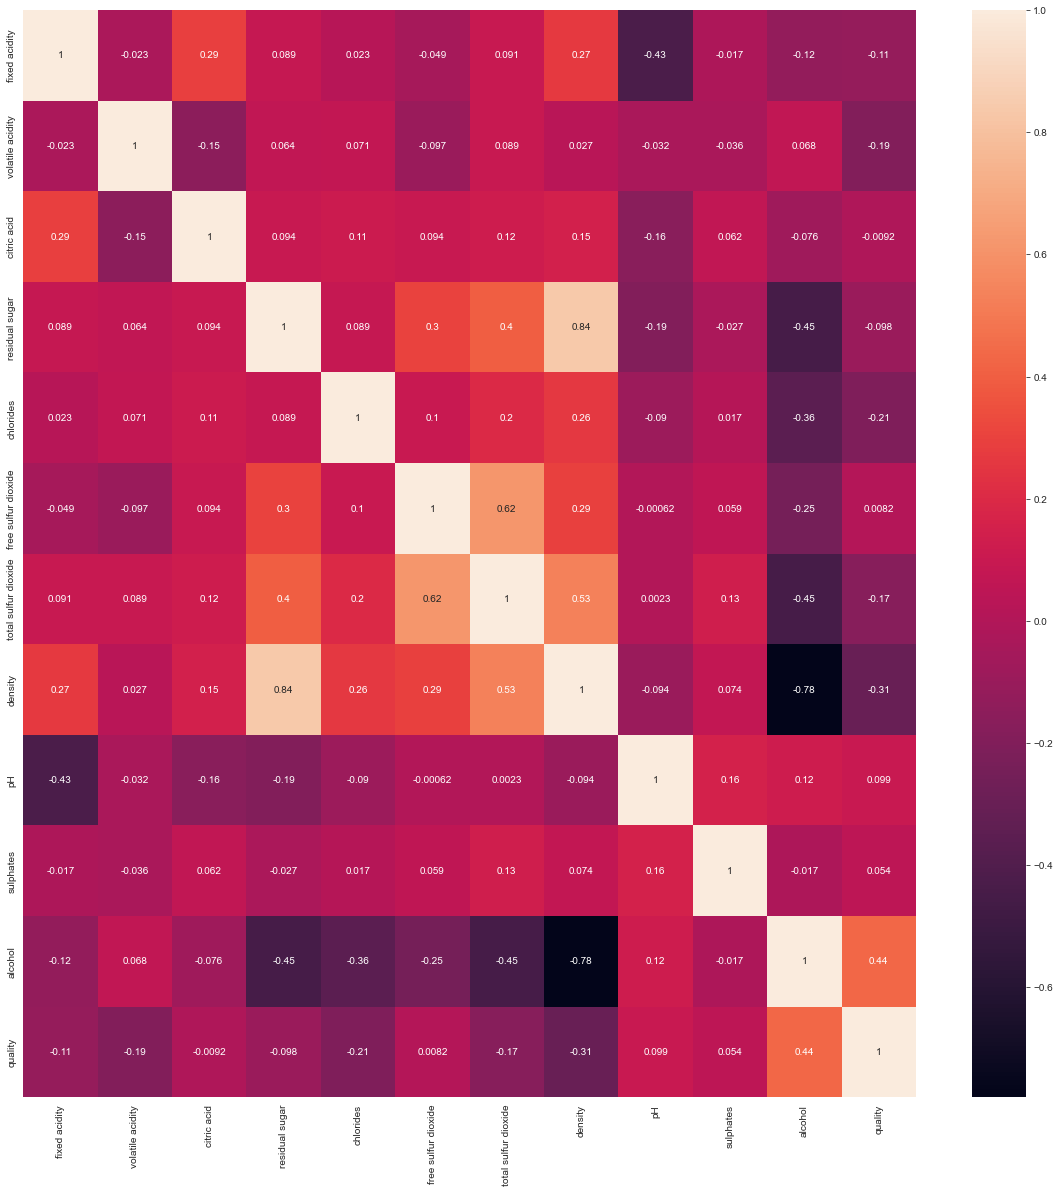

In [72]:
#  Ваш код здесь
plt.figure(figsize=(20,20))
sns.heatmap(wine.corr(),color = "k", annot=True)

Диаграмма корреляции

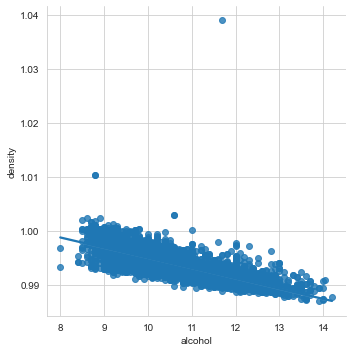

In [74]:
#  Ваш код здесь
sns.lmplot(x="alcohol",y="density",data=wine)

Отдельно постройте диаграмму рассеяния для переменных с высокими значениями модуля коэффициента корреляции. Что, по-Вашему, означает такое число и такая диаграмма?

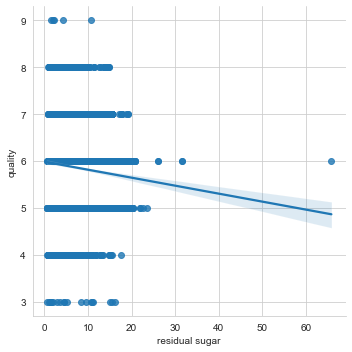

In [200]:
#  Ваш код здесь
sns.lmplot(x="residual sugar",y="quality",data=wine)

#Построение модели линейной регрессии

$y = a_0 + a_1x$ - уравнение прямой

Выделение зависимой (целевой) переменной y

In [201]:
#  Ваш код здесь
Y = wine.quality

Выделение независимой переменной-предиктора X

In [203]:
#  Ваш код здесь
# X = wine.drop('quality',axis=1)
X = wine['residual sugar']

Разбейте датасет на обучающую и тестовую выборки. Какую пропорцию разбиения разумней использовать? Почему?

In [204]:
#  Ваш код здесь
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
# X_train = np.array(X_train)
# X_train = np.array(X_train)
# print(len(X_train))
# print(len(Y_train))
# sc = StandardScaler()
# X_train = X_train.reshape(1,1)
# X_test = sc.transform(X_test)

Постройте регрессионную (линейную) модель по обучающей выборке и выведите коэффициенты уравнения регрессии:

Постройте диаграмму рассеяния данных обучающей выборки и проведите через корреляционное облако прямую с использованием найденных коэффициентов уравнения линейной регрессии

[-0.01772611]


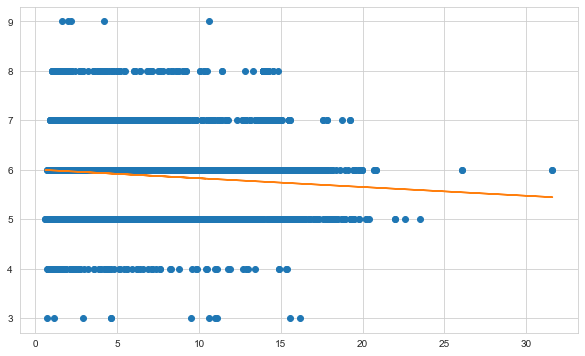

In [226]:
#  Ваш код здесь
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X_train, y = Y_train)
plt.plot(X_train,Y_train,linestyle = 'None')
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1,1), Y_train)
k = regressor.coef_
b = regressor.intercept_
x = X_train
y = (k*x)+b
plt.plot(x, y)
# X_train.shape()

In [227]:
#  Ваш код здесь

Выполните на тестовой выборке прогнозирование с использованием построенной модели и сравните результаты работы модели с реальными данными

In [230]:
#  Ваш код здесь
Y_pred = regressor.predict(np.array(X_test).reshape(-1,1))
df = pd.DataFrame({'Реальные': Y_test, 'Спрогнозированные': Y_pred})
df

,Реальные,Спрогнозированные
2762,5,5.980079
42,6,5.873722
1419,7,5.976534
3664,8,5.903857
2125,5,5.789523
...,...,...
2111,5,5.701779
1828,6,5.893221
1256,6,5.980079
3335,6,5.762934


Оцените качество предсказания с использованием метрики RMSE и диаграммы остатков

Root Mean Squared Error: 0.9382800563810868


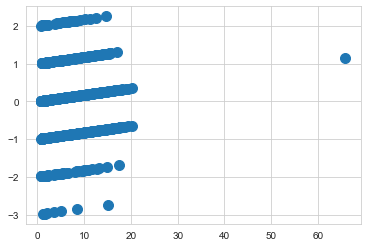

In [266]:
#  Ваш код здесь
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
plt.plot(X_test,Y_test-Y_pred,linestyle='None', marker='o', markersize=10)

#Модель линейной регрессии с несколькими предикторами

Постройте регрессионную модель с несколькими предикторами $y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4 + ...$ - уравнение прямой в многомерном пространстве.

Выделение зависимой (целевой) переменной y



In [273]:
#  Ваш код здесь
Y = wine.quality


Выделение независимых переменных-предикторов X

In [274]:
#  Ваш код здесь
X = wine.drop('quality', axis=1)

Разбейте датасет на обучающую и тестовую выборки. Какую пропорцию разбиения разумней использовать? Почему?



In [275]:
#  Ваш код здесь
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

Постройте регрессионную (линейную) модель по обучающей выборке и выведите коэффициенты уравнения регрессии. Попробуйте интерпретировать значения полученных коэффициентов

In [280]:
#  Ваш код здесь
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, Y_train)

LinearRegression()

Выполните на тестовой выборке прогнозирование с использованием построенной модели и сравните результаты работы модели с реальными данными

In [282]:
#  Ваш код здесь
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(metrics.mean_squared_error(Y_test, pred)))


Оцените качество предсказания с использованием метрики RMSE

In [283]:
#  Ваш код здесь
print(test_set_rmse)

0.8123086554972707


## <center> Регрессионные модели, основанные на деревьях решений

### 1. Модель деревьев решений

Постройте регрессионную модель деревьев решений (с использованием DecisionTreeRegressor из sklearn.tree) и выполните предсказание с ее помощью

In [292]:
#  Ваш код здесь
tree = DecisionTreeRegressor(random_state = 0)


Выполните на тестовой выборке прогнозирование с использованием построенной модели и сравните результаты работы модели с реальными данными

In [294]:
#  Ваш код здесь
tree.fit(X_train, Y_train)
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))

[5]Decision Tree Classifier Training Accuracy: 1.0


Оцените качество предсказания с использованием метрики RMSE

In [60]:
#  Ваш код здесь

### 2. Модель RandomForest

Постройте регрессионную модель на основе RandomForest (с использованием sklearn.ensemble и RandomForestRegressor) и выполните предсказание с ее помощью

In [61]:
#  Ваш код здесь

Выполните на тестовой выборке прогнозирование с использованием построенной модели и сравните результаты работы модели с реальными данными

In [62]:
#  Ваш код здесь

Оцените качество предсказания с использованием метрики RMSE

In [63]:
#  Ваш код здесь

### 3. Модели на базе алгоритмов бустинга

Постройте регрессионные модели на основе XGBoost и CatBoost. Выполните предсказание с их помощью

In [64]:
#  Ваш код здесь

Выполните на тестовой выборке прогнозирование с использованием построенной модели и сравните результаты работы модели с реальными данными

In [65]:
#  Ваш код здесь

Оцените качество предсказания с использованием метрики RMSE

In [66]:
#  Ваш код здесь